In [1]:
from math import ceil
import os
import json as json
import numpy as np
from tqdm import tqdm

from tenso.prototypes.heom import spin_boson #Spin-boson helper function
from tenso.prototypes.bath import gen_bcf #Bath correlation function generator
import matplotlib.pyplot as plt


In [12]:
H = np.array([[1500/2, 600/2], [600/2, -1500/2]], dtype=np.complex128)
# Diagonalization
evals, U = np.linalg.eigh(H)
id_max = np.argmax(evals)
end_time = 500.0 #fs
dt = 0.5
wfn = U[:, id_max ] #Eigenstate with highest energy


In [13]:
import numpy as np
from math import ceil
from tqdm import tqdm

n_ltcs = [1, 2, 3]
bath_corrs = []

# 1. Bath generation
for n_ltc in n_ltcs:
    bath_simulation = gen_bcf(
        re_d=[540], 
        width_d=[70], 
        temperature=100, 
        decomposition_method='Pade', 
        n_ltc=n_ltc, 
    )
    bath_corrs.append(bath_simulation)

# 2. Simulation
for n_ltc, bath in zip(n_ltcs, bath_corrs):
    
    # CORRECCIÓN: Agregada la 'f' antes de las comillas para formatear el nombre
    filename = f'spin_boson_n_ltc_{n_ltc}' 
    
    propagator = spin_boson(
        fname = filename,
        init_rdo = np.outer(wfn, wfn.conj()),
        sys_ham=H,
        sys_op=np.array([[0.5, 0], [0, -0.5]], dtype=np.complex128),
        bath_correlation=bath, # Aquí usamos el baño que corresponde a este ciclo
        dim=15,
        end_time=end_time,
        step_time=dt,
    )
    
    progress_bar = tqdm(propagator, total=ceil(end_time / dt))
    for _t in progress_bar:
        progress_bar.set_description(f'Simulando n_ltc={n_ltc} @ {_t:.2f} fs')

  0%|          | 0/1000 [00:00<?, ?it/s]

{'dim': 15, 'end_time': 500.0, 'step_time': 0.5}
{'auxiliary_ps_method': 'ps2', 'auxiliary_step_time': None, 'cache_svd_info': True, 'dim': 15, 'dvr_length': 32, 'dvr_type': 'sine', 'end_time': 500.0, 'frame_method': 'tree2', 'load_checkpoint_from_file': False, 'max_auxiliary_rank': 32, 'max_auxiliary_steps': None, 'metric': 're', 'ode_atol': 1e-07, 'ode_method': 'dopri5', 'ode_rtol': 1e-05, 'ps2_atol': 1e-07, 'ps2_ratio': 2.0, 'ps_method': 'vmf', 'rank': 3, 'renormalize': False, 'save_checkpoint_to_file': False, 'start_time': 0.0, 'step_time': 0.5, 'stepwise_method': 'mix', 'use_dvr': False, 'visualize_frame': False, 'vmf_atol': 1e-07, 'vmf_reg_method': 'extend', 'vmf_reg_type': 'ip'}
For k=0: s:0.06860883 | e:0.00000000 | a:-0.03780000 | f:0.26193287 | f^2:0.06860883
For k=1: s:0.04963877 | e:0.00000000 | a:0.00000000 | f:0.22279759 | f^2:0.04963877


Simulando n_ltc=1 @ 500.00 fs: : 1001it [00:06, 144.52it/s]                       
  0%|          | 0/1000 [00:00<?, ?it/s]

{'dim': 15, 'end_time': 500.0, 'step_time': 0.5}
{'auxiliary_ps_method': 'ps2', 'auxiliary_step_time': None, 'cache_svd_info': True, 'dim': 15, 'dvr_length': 32, 'dvr_type': 'sine', 'end_time': 500.0, 'frame_method': 'tree2', 'load_checkpoint_from_file': False, 'max_auxiliary_rank': 32, 'max_auxiliary_steps': None, 'metric': 're', 'ode_atol': 1e-07, 'ode_method': 'dopri5', 'ode_rtol': 1e-05, 'ps2_atol': 1e-07, 'ps2_ratio': 2.0, 'ps_method': 'vmf', 'rank': 3, 'renormalize': False, 'save_checkpoint_to_file': False, 'start_time': 0.0, 'step_time': 0.5, 'stepwise_method': 'mix', 'use_dvr': False, 'visualize_frame': False, 'vmf_atol': 1e-07, 'vmf_reg_method': 'extend', 'vmf_reg_type': 'ip'}
For k=0: s:0.06860883 | e:0.00000000 | a:-0.03780000 | f:0.26193287 | f^2:0.06860883
For k=1: s:0.02541267 | e:0.00000000 | a:0.00000000 | f:0.15941352 | f^2:0.02541267
For k=2: s:0.04639323 | e:0.00000000 | a:0.00000000 | f:0.21539088 | f^2:0.04639323


Simulando n_ltc=2 @ 500.00 fs: : 1001it [01:22, 12.08it/s]                       
  0%|          | 0/1000 [00:00<?, ?it/s]

{'dim': 15, 'end_time': 500.0, 'step_time': 0.5}
{'auxiliary_ps_method': 'ps2', 'auxiliary_step_time': None, 'cache_svd_info': True, 'dim': 15, 'dvr_length': 32, 'dvr_type': 'sine', 'end_time': 500.0, 'frame_method': 'tree2', 'load_checkpoint_from_file': False, 'max_auxiliary_rank': 32, 'max_auxiliary_steps': None, 'metric': 're', 'ode_atol': 1e-07, 'ode_method': 'dopri5', 'ode_rtol': 1e-05, 'ps2_atol': 1e-07, 'ps2_ratio': 2.0, 'ps_method': 'vmf', 'rank': 3, 'renormalize': False, 'save_checkpoint_to_file': False, 'start_time': 0.0, 'step_time': 0.5, 'stepwise_method': 'mix', 'use_dvr': False, 'visualize_frame': False, 'vmf_atol': 1e-07, 'vmf_reg_method': 'extend', 'vmf_reg_type': 'ip'}
For k=0: s:0.06860883 | e:0.00000000 | a:-0.03780000 | f:0.26193287 | f^2:0.06860883
For k=1: s:0.02470400 | e:0.00000000 | a:0.00000000 | f:0.15717506 | f^2:0.02470400
For k=2: s:0.01527159 | e:0.00000000 | a:0.00000000 | f:0.12357828 | f^2:0.01527159
For k=3: s:0.04691634 | e:0.00000000 | a:0.00000000 

Simulando n_ltc=3 @ 37.00 fs:   8%|▊         | 75/1000 [00:23<05:54,  2.61it/s]

Switched to vmf.


Simulando n_ltc=3 @ 500.00 fs: : 1001it [04:03,  4.11it/s]                        


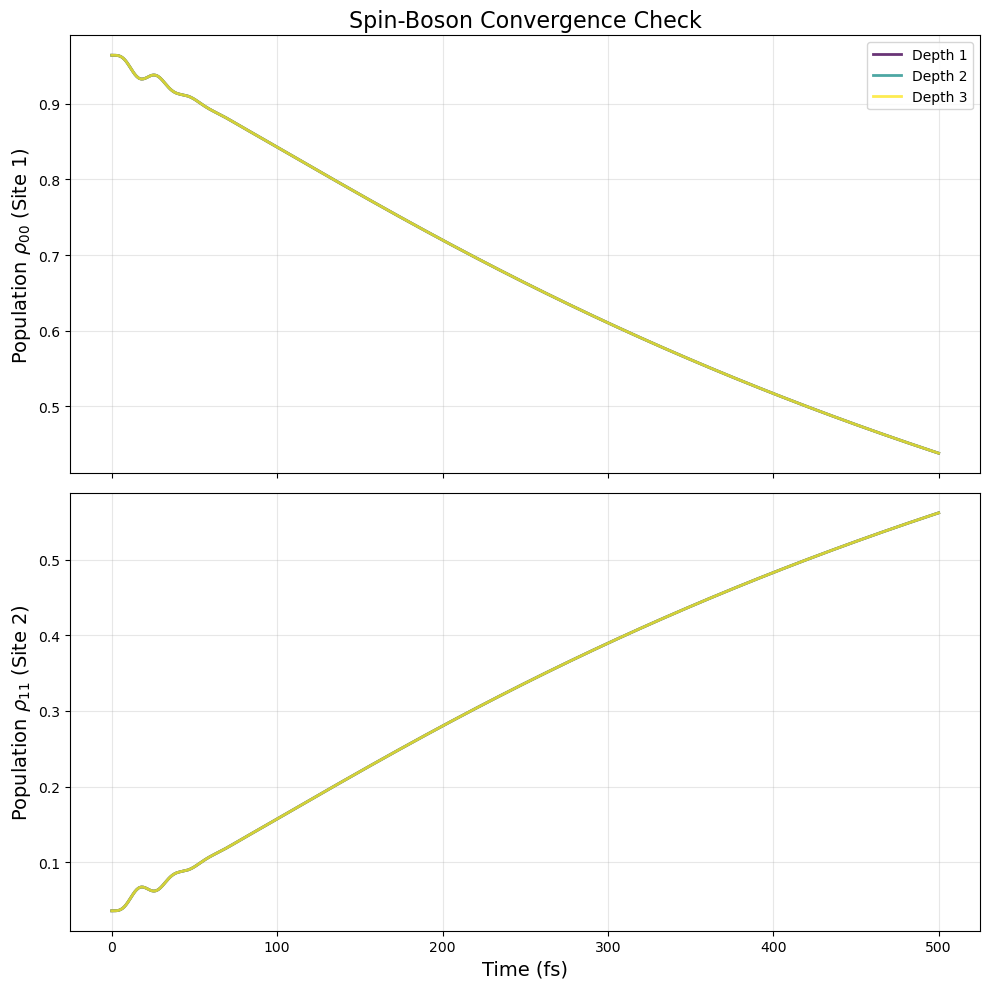

In [14]:

import matplotlib.pyplot as plt
import numpy as np
import os

# The list of dimensions (HEOM depths) you provided
dims = [1, 2, 3]

def parse_2level_file(filename):
    times = []
    pop_0 = [] # rho_00
    pop_1 = [] # rho_11

    if not os.path.exists(filename):
        print(f"Warning: File '{filename}' not found. Skipping.")
        return None

    with open(filename, 'r') as f:
        for line in f:
            # Skip comments or empty lines
            if line.strip().startswith('#') or not line.strip():
                continue
            
            parts = line.split()
            
            # 1. Parse Time
            times.append(float(parts[0]))
            
            # 2. Parse Populations
            # The structure is Time, rho00, rho01, rho10, rho11
            # Python indices (0-based):
            # Time = 0
            # rho00 = 1
            # rho01 = 2
            # rho10 = 3
            # rho11 = 4
            
            rho_00 = complex(parts[1])
            rho_11 = complex(parts[4])
            
            pop_0.append(rho_00.real)
            pop_1.append(rho_11.real)
            
    return times, pop_0, pop_1

# --- Plotting Configuration ---

# Create a figure with two subplots (stacked vertically)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Generate distinct colors for each dimension using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(dims)))

# Loop through the dimensions and plot
for i, dim in enumerate(dims):
    # Construct filename based on your list
    # Note: If your files have an extension like .dat, add it here: f'spin_boson_dim_{dim}.dat'
    fname = f'spin_boson_n_ltc_{n_ltc}.dat.log'
    
    data = parse_2level_file(fname)
    
    if data:
        t, p0, p1 = data
        
        # Plot Site 1 (rho_00) on top subplot
        ax1.plot(t, p0, label=f'Depth {dim}', color=colors[i], linewidth=2, alpha=0.8)
        
        # Plot Site 2 (rho_11) on bottom subplot
        ax2.plot(t, p1, label=f'Depth {dim}', color=colors[i], linewidth=2, alpha=0.8)

# --- Formatting ---

# Subplot 1: Site 1
ax1.set_title('Spin-Boson Convergence Check', fontsize=16)
ax1.set_ylabel('Population $\\rho_{00}$ (Site 1)', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper right', fontsize=10)

# Subplot 2: Site 2
ax2.set_ylabel('Population $\\rho_{11}$ (Site 2)', fontsize=14)
ax2.set_xlabel('Time (fs)', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()